# Day 41: Introduction to Dimensionality Reduction and PCA Basics

Welcome to Day 41 of the 100 Days of Machine Learning Challenge! Today, we embark on an exciting journey into the world of dimensionality reduction, one of the most powerful techniques in machine learning for handling high-dimensional data. We'll explore the fundamentals of Principal Component Analysis (PCA), a cornerstone method that has transformed how data scientists approach complex datasets.

## What is Dimensionality Reduction?

Dimensionality reduction is the process of reducing the number of features (dimensions) in a dataset while preserving as much of the important information as possible. In the modern era of big data, we often encounter datasets with hundreds or even thousands of features. While more features can potentially provide more information, they also introduce several challenges:

- **Computational Complexity**: More features mean longer training times and higher computational costs
- **Storage Requirements**: High-dimensional data requires more storage space
- **Curse of Dimensionality**: As dimensions increase, data becomes increasingly sparse, making it harder for machine learning algorithms to find meaningful patterns
- **Visualization Challenges**: Humans can only visualize data in 2D or 3D effectively
- **Overfitting**: More features can lead to models that memorize training data rather than learning generalizable patterns

Dimensionality reduction techniques address these challenges by transforming high-dimensional data into a lower-dimensional space that captures the essence of the original data.

## Why Does Dimensionality Reduction Matter?

Dimensionality reduction is crucial in machine learning for several reasons:

1. **Improved Model Performance**: By removing redundant or irrelevant features, models can focus on the most important patterns, often leading to better generalization
2. **Faster Training**: Fewer dimensions mean faster computations, enabling quicker experimentation and iteration
3. **Data Visualization**: Reducing high-dimensional data to 2D or 3D allows us to visualize and understand patterns that would otherwise be invisible
4. **Noise Reduction**: Dimensionality reduction can help filter out noise by focusing on the principal components of variance
5. **Feature Engineering**: Understanding which dimensions capture the most variance can provide insights into the underlying structure of the data

## Learning Objectives

By the end of this lesson, you will be able to:

- Understand the fundamental concepts of dimensionality reduction and when to apply it
- Explain the mathematical foundation of PCA, including covariance matrices, eigenvalues, and eigenvectors
- Visualize how PCA transforms high-dimensional data into lower dimensions
- Understand the relationship between variance and principal components
- Apply basic PCA concepts to prepare for practical implementation in the next lesson

# Principal Component Analysis (PCA): The Foundation

Principal Component Analysis (PCA) is one of the most widely used dimensionality reduction techniques. It was invented by Karl Pearson in 1901 and has since become a fundamental tool in statistics, data science, and machine learning.

## Definition and Core Concept

PCA is a linear transformation technique that identifies the directions (called principal components) along which the data varies the most. These principal components are:

- **Orthogonal** (perpendicular) to each other
- **Ordered by variance**: The first principal component captures the most variance, the second captures the second-most variance (subject to being orthogonal to the first), and so on
- **Linear combinations** of the original features

Think of PCA as finding the best "view" of your data. Imagine you're looking at a 3D object and trying to take a 2D photograph that captures as much information as possible. PCA helps you find the optimal angle to take that photograph.

## The Intuition Behind PCA

Let's develop an intuition for PCA with a simple example. Imagine you have data about people's heights and weights. These two features are correlated—taller people tend to weigh more. PCA would identify:

1. **First Principal Component**: A direction that captures the general "size" of a person (a combination of height and weight)
2. **Second Principal Component**: A direction perpendicular to the first, capturing how much someone deviates from the expected weight given their height

The first component captures most of the variance, so if we needed to reduce from 2D to 1D, we could keep just this component and lose minimal information.

## Mathematical Foundation

Now let's dive into the mathematics that make PCA work. Don't worry if this seems complex at first—we'll build up the concepts step by step.

### Variance and Covariance

Before understanding PCA, we need to understand variance and covariance.

**Variance** measures how much a single variable spreads out from its mean:

$$\text{Var}(X) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

Where $x_i$ is each data point, $\bar{x}$ is the mean, and $n$ is the number of data points.

**Covariance** measures how two variables change together:

$$\text{Cov}(X, Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

- If $\text{Cov}(X, Y) > 0$: Variables tend to increase together (positive correlation)
- If $\text{Cov}(X, Y) < 0$: When one increases, the other tends to decrease (negative correlation)
- If $\text{Cov}(X, Y) \approx 0$: Variables are uncorrelated

### The Covariance Matrix

For a dataset with $p$ features, the **covariance matrix** $\Sigma$ is a $p \times p$ matrix where:

$$\Sigma = \begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_p) \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2, X_p) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_p, X_1) & \text{Cov}(X_p, X_2) & \cdots & \text{Var}(X_p)
\end{bmatrix}$$

The diagonal elements are the variances of each feature, and the off-diagonal elements are the covariances between pairs of features. The covariance matrix is always:
- **Symmetric**: $\text{Cov}(X_i, X_j) = \text{Cov}(X_j, X_i)$
- **Square**: Has dimensions $p \times p$

### Eigenvalues and Eigenvectors

This is where the magic of PCA happens. For a square matrix $A$, an **eigenvector** $v$ and its corresponding **eigenvalue** $\lambda$ satisfy:

$$Av = \lambda v$$

In simpler terms:
- An **eigenvector** is a direction that remains unchanged (only scaled) when a linear transformation is applied
- An **eigenvalue** tells us how much the eigenvector is scaled

For PCA, we compute the eigenvectors and eigenvalues of the covariance matrix:

$$\Sigma v = \lambda v$$

The eigenvectors of the covariance matrix point in the directions of maximum variance, and their corresponding eigenvalues tell us how much variance exists in those directions.

### PCA Algorithm Steps

The PCA algorithm can be summarized in these steps:

1. **Standardize the data**: Center the data by subtracting the mean of each feature (and optionally scale to unit variance)
   $$X_{\text{centered}} = X - \mu$$

2. **Compute the covariance matrix**: Calculate how features vary together
   $$\Sigma = \frac{1}{n-1}X_{\text{centered}}^T X_{\text{centered}}$$

3. **Compute eigenvalues and eigenvectors**: Find the principal components
   $$\Sigma v_i = \lambda_i v_i$$

4. **Sort by eigenvalues**: Order components by the amount of variance they explain
   $$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_p$$

5. **Select top k components**: Choose the first $k$ eigenvectors to form your new basis
   $$W = [v_1, v_2, \ldots, v_k]$$

6. **Transform the data**: Project the original data onto the new basis
   $$X_{\text{reduced}} = X_{\text{centered}} \cdot W$$

### Explained Variance

A crucial concept in PCA is **explained variance**. The proportion of variance explained by the $i$-th principal component is:

$$\text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_{j=1}^{p}\lambda_j}$$

This tells us what percentage of the total variance in the data is captured by each component. We typically want to select enough components to capture a high percentage (e.g., 95%) of the total variance.

# Visualizing Dimensionality Reduction Concepts

Let's build our intuition with some visualizations. We'll start by importing the necessary libraries and creating some example data.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris, load_digits
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4


## Understanding Variance in Data

Let's start by visualizing what variance means in a dataset. We'll create a simple 2D dataset and show how variance is distributed.

Variance in dimension 1 (x1): 0.9686
Variance in dimension 2 (x2): 0.7433
Total variance: 1.7120


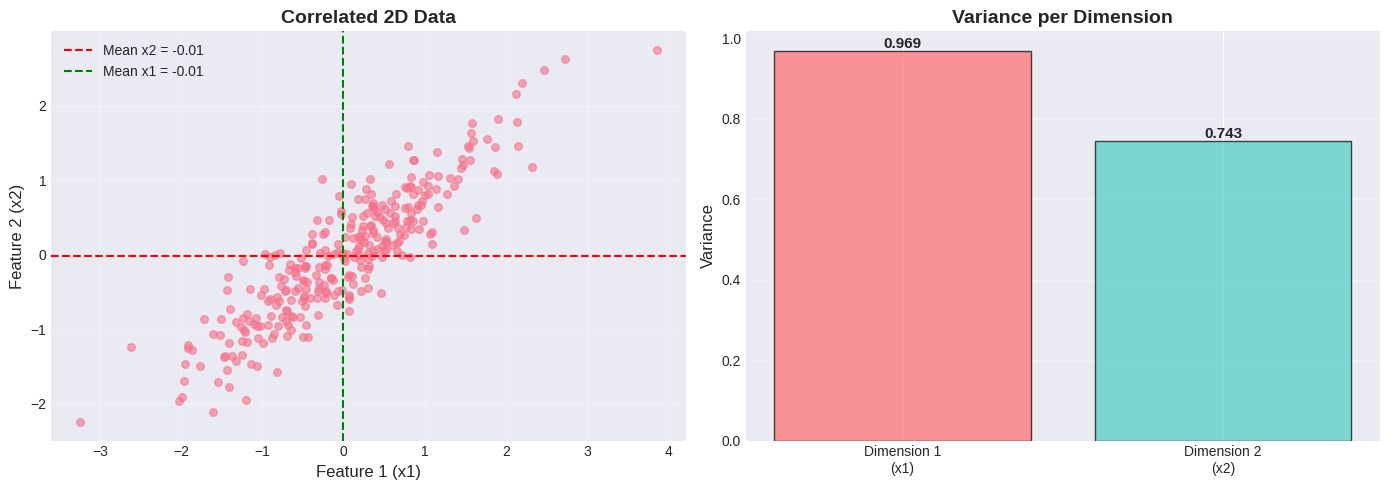


Observation: The data shows correlation between x1 and x2, as visible in the diagonal spread.


In [2]:
# Create a correlated 2D dataset
np.random.seed(42)
n_samples = 300

# Generate correlated data
x1 = np.random.randn(n_samples)
x2 = x1 * 0.8 + np.random.randn(n_samples) * 0.4  # Correlated with x1

# Combine into a dataset
X = np.column_stack([x1, x2])

# Calculate variance for each dimension
var_x1 = np.var(X[:, 0], ddof=1)
var_x2 = np.var(X[:, 1], ddof=1)
total_var = var_x1 + var_x2

print(f"Variance in dimension 1 (x1): {var_x1:.4f}")
print(f"Variance in dimension 2 (x2): {var_x2:.4f}")
print(f"Total variance: {total_var:.4f}")

# Visualize the data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Scatter plot with means
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.6, s=30)
axes[0].axhline(y=np.mean(X[:, 1]), color='r', linestyle='--', label=f'Mean x2 = {np.mean(X[:, 1]):.2f}')
axes[0].axvline(x=np.mean(X[:, 0]), color='g', linestyle='--', label=f'Mean x1 = {np.mean(X[:, 0]):.2f}')
axes[0].set_xlabel('Feature 1 (x1)', fontsize=12)
axes[0].set_ylabel('Feature 2 (x2)', fontsize=12)
axes[0].set_title('Correlated 2D Data', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Variance comparison
variances = [var_x1, var_x2]
dimensions = ['Dimension 1\n(x1)', 'Dimension 2\n(x2)']
colors = ['#FF6B6B', '#4ECDC4']
bars = axes[1].bar(dimensions, variances, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Variance', fontsize=12)
axes[1].set_title('Variance per Dimension', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, var in zip(bars, variances):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{var:.3f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nObservation: The data shows correlation between x1 and x2, as visible in the diagonal spread.")

## Visualizing the Covariance Matrix

The covariance matrix is central to PCA. Let's compute and visualize it for our 2D data.

Covariance Matrix:
[[0.96863722 0.75957599]
 [0.75957599 0.74334719]]

Shape: (2, 2)

Diagonal elements (variances): [0.9686, 0.7433]
Off-diagonal elements (covariances): 0.7596


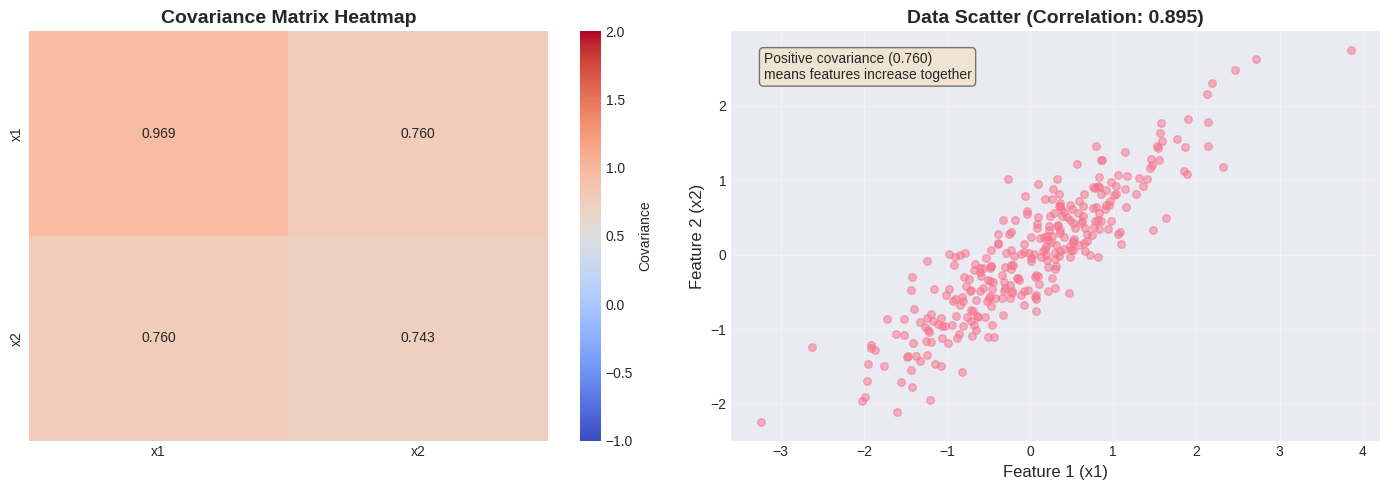

In [3]:
# Compute the covariance matrix
cov_matrix = np.cov(X.T)

print("Covariance Matrix:")
print(cov_matrix)
print(f"\nShape: {cov_matrix.shape}")
print(f"\nDiagonal elements (variances): [{cov_matrix[0,0]:.4f}, {cov_matrix[1,1]:.4f}]")
print(f"Off-diagonal elements (covariances): {cov_matrix[0,1]:.4f}")

# Visualize the covariance matrix as a heatmap
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap
sns.heatmap(cov_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            xticklabels=['x1', 'x2'], yticklabels=['x1', 'x2'],
            cbar_kws={'label': 'Covariance'}, ax=axes[0],
            vmin=-1, vmax=2)
axes[0].set_title('Covariance Matrix Heatmap', fontsize=14, fontweight='bold')

# Correlation interpretation
correlation = cov_matrix[0, 1] / (np.sqrt(cov_matrix[0, 0]) * np.sqrt(cov_matrix[1, 1]))
axes[1].scatter(X[:, 0], X[:, 1], alpha=0.5, s=30)
axes[1].set_xlabel('Feature 1 (x1)', fontsize=12)
axes[1].set_ylabel('Feature 2 (x2)', fontsize=12)
axes[1].set_title(f'Data Scatter (Correlation: {correlation:.3f})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add annotation
axes[1].text(0.05, 0.95, 
            f'Positive covariance ({cov_matrix[0,1]:.3f})\nmeans features increase together',
            transform=axes[1].transAxes,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            verticalalignment='top')

plt.tight_layout()
plt.show()

## Computing Eigenvectors and Eigenvalues

Now let's compute the eigenvectors and eigenvalues of the covariance matrix. These are the principal components!

Eigenvalues (amount of variance in each principal component):
[1.62387539 0.08810902]

Eigenvectors (direction of principal components):
[[ 0.7571973  -0.65318623]
 [ 0.65318623  0.7571973 ]]

Explained Variance Ratio:
  PC1: 0.9485 (94.85%)
  PC2: 0.0515 (5.15%)


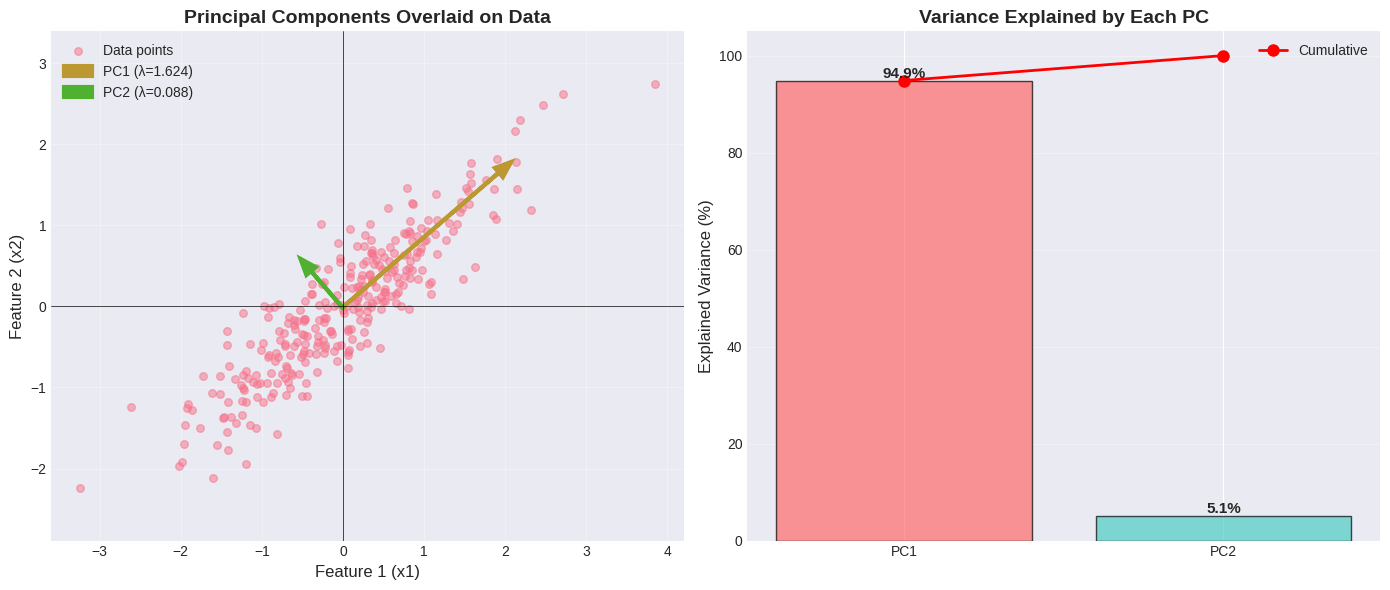


Cumulative explained variance: 100.00%


In [4]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues (amount of variance in each principal component):")
print(eigenvalues)
print(f"\nEigenvectors (direction of principal components):")
print(eigenvectors)

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / eigenvalues.sum()
print(f"\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

# Visualize the principal components
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Data with principal component arrows
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.5, s=30, label='Data points')
axes[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# Plot eigenvectors as arrows from origin
mean_x = X.mean(axis=0)
for i, (eigenvalue, eigenvector) in enumerate(zip(eigenvalues, eigenvectors.T)):
    # Scale arrow by eigenvalue for visualization
    scale = np.sqrt(eigenvalue) * 2
    axes[0].arrow(mean_x[0], mean_x[1], 
                 eigenvector[0] * scale, eigenvector[1] * scale,
                 head_width=0.15, head_length=0.2, 
                 fc=f'C{i+1}', ec=f'C{i+1}', linewidth=3,
                 label=f'PC{i+1} (λ={eigenvalue:.3f})')

axes[0].set_xlabel('Feature 1 (x1)', fontsize=12)
axes[0].set_ylabel('Feature 2 (x2)', fontsize=12)
axes[0].set_title('Principal Components Overlaid on Data', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axis('equal')

# Right: Explained variance ratio
pcs = ['PC1', 'PC2']
colors = ['#FF6B6B', '#4ECDC4']
bars = axes[1].bar(pcs, explained_variance_ratio * 100, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Explained Variance (%)', fontsize=12)
axes[1].set_title('Variance Explained by Each PC', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, ratio in zip(bars, explained_variance_ratio):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{ratio*100:.1f}%',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add cumulative line
cumulative = np.cumsum(explained_variance_ratio) * 100
axes[1].plot(pcs, cumulative, 'ro-', linewidth=2, markersize=8, label='Cumulative')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nCumulative explained variance: {cumulative[-1]:.2f}%")

## PCA Transformation: From Original to Principal Component Space

Now let's see how PCA transforms our data into the principal component space.

Original data shape: (300, 2)
Transformed data shape: (300, 2)

First 5 samples in original space:
[[ 0.49671415  0.06577332]
 [-0.1382643  -0.33468386]
 [ 0.64768854  0.81706827]
 [ 1.52302986  1.46257199]
 [-0.23415337 -0.19568334]]

First 5 samples in PC space:
[[ 0.43178837 -0.26839776]
 [-0.31058871 -0.15686367]
 [ 1.03684129  0.20186636]
 [ 2.12128151  0.11887914]
 [-0.29240243  0.01102057]]


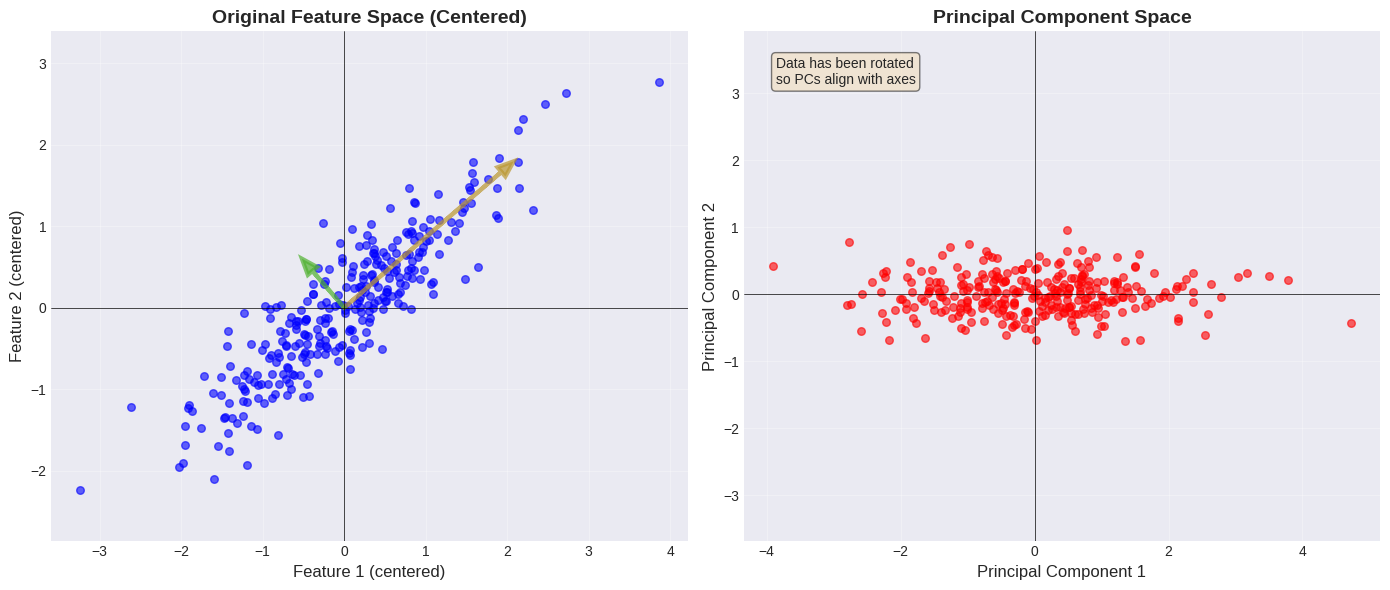


Covariance matrix in PC space (should be diagonal):
[[1.62387539e+00 2.16846147e-17]
 [2.16846147e-17 8.81090185e-02]]

Note: Off-diagonal elements are nearly zero, confirming PCs are uncorrelated!


In [5]:
# Center the data (subtract mean)
X_centered = X - X.mean(axis=0)

# Transform to PC space (project onto eigenvectors)
X_pca = X_centered @ eigenvectors

print(f"Original data shape: {X.shape}")
print(f"Transformed data shape: {X_pca.shape}")
print(f"\nFirst 5 samples in original space:")
print(X[:5])
print(f"\nFirst 5 samples in PC space:")
print(X_pca[:5])

# Visualize the transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original space
axes[0].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.6, s=30, c='blue')
axes[0].set_xlabel('Feature 1 (centered)', fontsize=12)
axes[0].set_ylabel('Feature 2 (centered)', fontsize=12)
axes[0].set_title('Original Feature Space (Centered)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
axes[0].axis('equal')

# Add eigenvector directions
for i, eigenvector in enumerate(eigenvectors.T):
    scale = np.sqrt(eigenvalues[i]) * 2
    axes[0].arrow(0, 0, eigenvector[0] * scale, eigenvector[1] * scale,
                 head_width=0.15, head_length=0.2, 
                 fc=f'C{i+1}', ec=f'C{i+1}', linewidth=3, alpha=0.7)

# PC space
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=30, c='red')
axes[1].set_xlabel('Principal Component 1', fontsize=12)
axes[1].set_ylabel('Principal Component 2', fontsize=12)
axes[1].set_title('Principal Component Space', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
axes[1].axis('equal')

# Add annotation about rotation
axes[1].text(0.05, 0.95, 
            'Data has been rotated\nso PCs align with axes',
            transform=axes[1].transAxes,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            verticalalignment='top')

plt.tight_layout()
plt.show()

# Verify that PCs are uncorrelated
cov_pca = np.cov(X_pca.T)
print("\nCovariance matrix in PC space (should be diagonal):")
print(cov_pca)
print("\nNote: Off-diagonal elements are nearly zero, confirming PCs are uncorrelated!")

## Demonstrating Dimensionality Reduction

Now let's see how we can reduce dimensions by keeping only the most important principal components.

Original data dimensions: (300, 2)
Reduced data dimensions: (300, 1)
Reconstructed data dimensions: (300, 2)

Reconstruction error (MSE): 0.0439
Variance retained: 94.85%


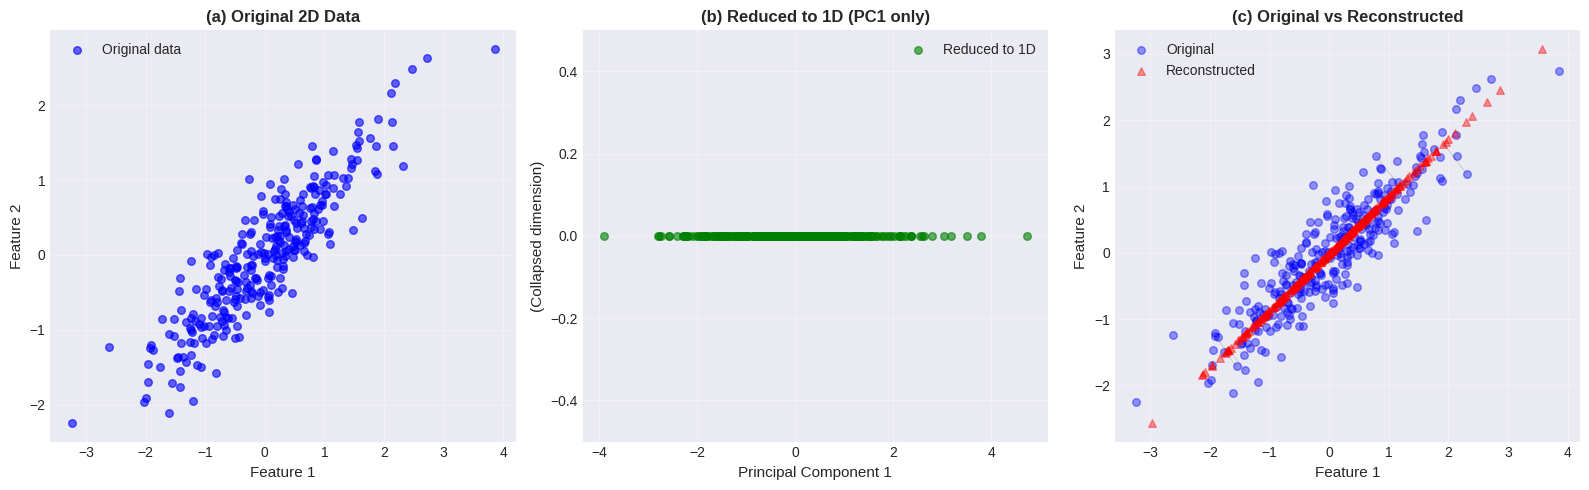


Observation: Reconstructed data lies along the direction of PC1.
The reconstruction captures the main trend but loses some detail.


In [6]:
# Keep only the first principal component (reduce from 2D to 1D)
X_reduced = X_pca[:, 0:1]  # Keep only PC1

# Reconstruct the data using only PC1
X_reconstructed = X_reduced @ eigenvectors[:, 0:1].T
X_reconstructed = X_reconstructed + X.mean(axis=0)  # Add back the mean

# Calculate reconstruction error
reconstruction_error = np.mean((X - X_reconstructed) ** 2)

print(f"Original data dimensions: {X.shape}")
print(f"Reduced data dimensions: {X_reduced.shape}")
print(f"Reconstructed data dimensions: {X_reconstructed.shape}")
print(f"\nReconstruction error (MSE): {reconstruction_error:.4f}")
print(f"Variance retained: {explained_variance_ratio[0]*100:.2f}%")

# Visualize the reduction
fig = plt.figure(figsize=(16, 5))

# Original data
ax1 = fig.add_subplot(131)
ax1.scatter(X[:, 0], X[:, 1], alpha=0.6, s=30, c='blue', label='Original data')
ax1.set_xlabel('Feature 1', fontsize=11)
ax1.set_ylabel('Feature 2', fontsize=11)
ax1.set_title('(a) Original 2D Data', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Reduced data (1D, but plotted in 2D space along PC1)
ax2 = fig.add_subplot(132)
ax2.scatter(X_reduced, np.zeros_like(X_reduced), alpha=0.6, s=30, c='green', label='Reduced to 1D')
ax2.set_xlabel('Principal Component 1', fontsize=11)
ax2.set_ylabel('(Collapsed dimension)', fontsize=11)
ax2.set_title('(b) Reduced to 1D (PC1 only)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim([-0.5, 0.5])

# Reconstructed vs Original
ax3 = fig.add_subplot(133)
ax3.scatter(X[:, 0], X[:, 1], alpha=0.4, s=30, c='blue', label='Original')
ax3.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.4, s=30, c='red', marker='^', label='Reconstructed')
# Draw lines showing reconstruction error
for i in range(0, len(X), 10):  # Plot every 10th point for clarity
    ax3.plot([X[i, 0], X_reconstructed[i, 0]], 
            [X[i, 1], X_reconstructed[i, 1]], 
            'k-', alpha=0.2, linewidth=0.5)
ax3.set_xlabel('Feature 1', fontsize=11)
ax3.set_ylabel('Feature 2', fontsize=11)
ax3.set_title('(c) Original vs Reconstructed', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservation: Reconstructed data lies along the direction of PC1.")
print("The reconstruction captures the main trend but loses some detail.")

# Real-World Example: Iris Dataset

Let's apply these concepts to the famous Iris dataset, which has 4 dimensions. We'll reduce it to 2D for visualization.

Iris dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Covariance matrix shape: (4, 4)


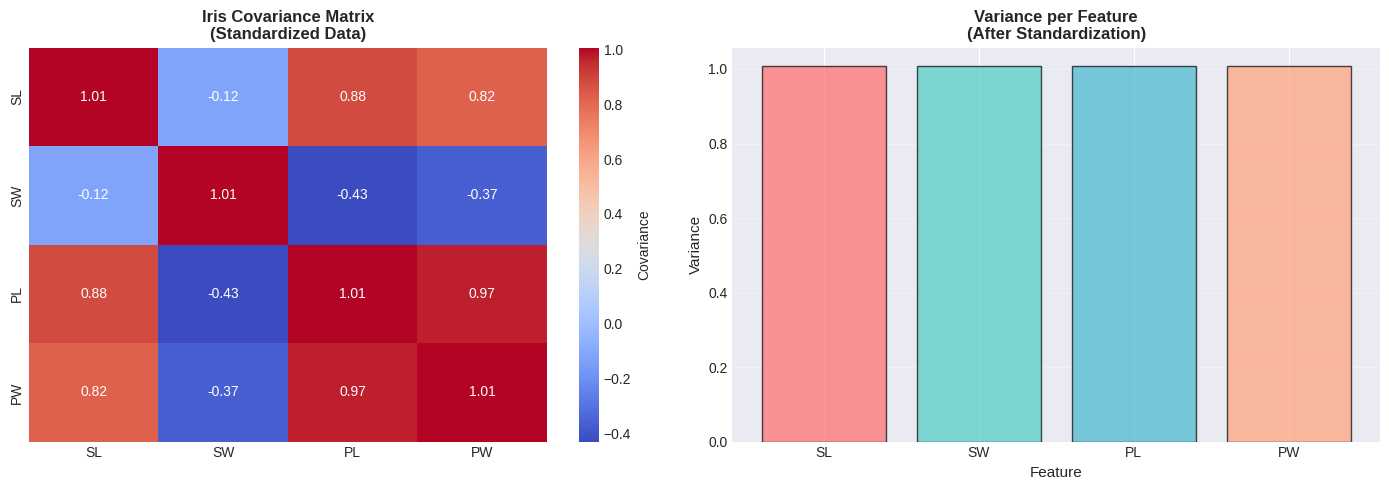


Note: After standardization, all features have similar variance (~1.0)
This ensures no feature dominates PCA due to scale differences.


In [7]:
# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")
print(f"\nFirst 5 samples:")
print(X_iris[:5])

# Standardize the data (important for PCA!)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Compute covariance matrix
cov_iris = np.cov(X_iris_scaled.T)

print(f"\nCovariance matrix shape: {cov_iris.shape}")

# Visualize correlation between features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Covariance matrix heatmap
sns.heatmap(cov_iris, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=['SL', 'SW', 'PL', 'PW'],  # Abbreviated names
            yticklabels=['SL', 'SW', 'PL', 'PW'],
            cbar_kws={'label': 'Covariance'}, ax=axes[0])
axes[0].set_title('Iris Covariance Matrix\n(Standardized Data)', fontsize=12, fontweight='bold')

# Feature variances
variances_iris = np.var(X_iris_scaled, axis=0, ddof=1)
axes[1].bar(range(len(feature_names)), variances_iris, 
           tick_label=['SL', 'SW', 'PL', 'PW'],
           color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
           alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Variance', fontsize=11)
axes[1].set_xlabel('Feature', fontsize=11)
axes[1].set_title('Variance per Feature\n(After Standardization)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nNote: After standardization, all features have similar variance (~1.0)")
print("This ensures no feature dominates PCA due to scale differences.")

## Performing PCA on Iris Dataset

Eigenvalues (variance explained by each PC):
  PC1: 2.9381 (72.96%)
  PC2: 0.9202 (22.85%)
  PC3: 0.1477 (3.67%)
  PC4: 0.0209 (0.52%)

Cumulative variance explained:
  PC1-PC1: 72.96%
  PC1-PC2: 95.81%
  PC1-PC3: 99.48%
  PC1-PC4: 100.00%


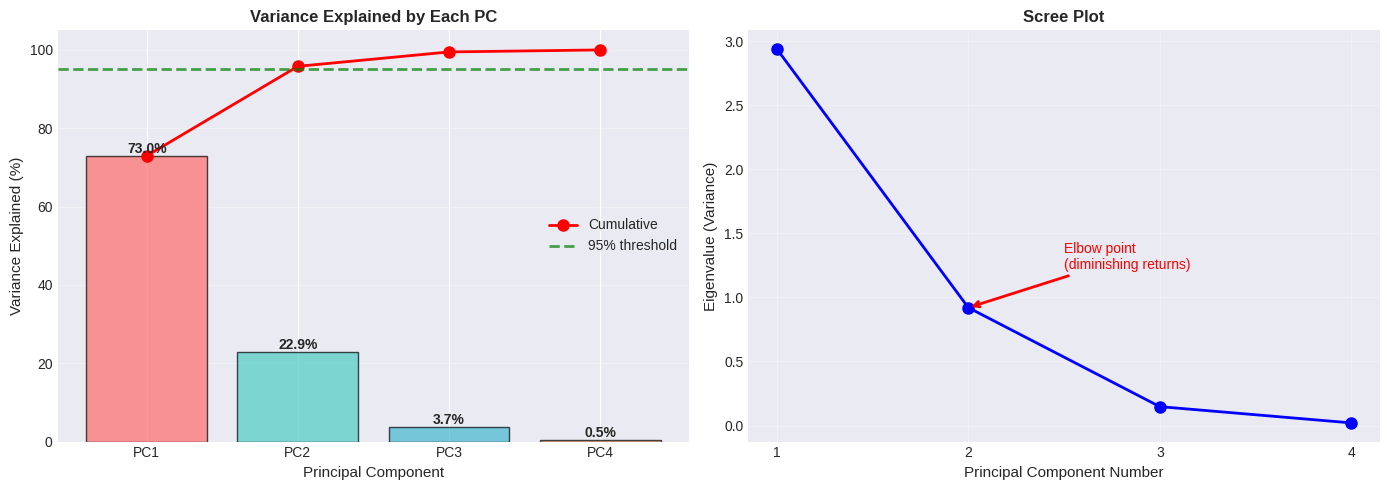


Conclusion: First 2 PCs capture 95.81% of variance.
This means we can reduce from 4D to 2D with minimal information loss!


In [8]:
# Compute eigenvalues and eigenvectors
eigenvalues_iris, eigenvectors_iris = np.linalg.eig(cov_iris)

# Sort by eigenvalues
idx = eigenvalues_iris.argsort()[::-1]
eigenvalues_iris = eigenvalues_iris[idx]
eigenvectors_iris = eigenvectors_iris[:, idx]

# Calculate explained variance ratio
explained_var_iris = eigenvalues_iris / eigenvalues_iris.sum()
cumulative_var_iris = np.cumsum(explained_var_iris)

print("Eigenvalues (variance explained by each PC):")
for i, (ev, ratio) in enumerate(zip(eigenvalues_iris, explained_var_iris)):
    print(f"  PC{i+1}: {ev:.4f} ({ratio*100:.2f}%)")

print(f"\nCumulative variance explained:")
for i, cum_var in enumerate(cumulative_var_iris):
    print(f"  PC1-PC{i+1}: {cum_var*100:.2f}%")

# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual and cumulative variance
pcs = [f'PC{i+1}' for i in range(len(eigenvalues_iris))]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

bars = axes[0].bar(pcs, explained_var_iris * 100, color=colors, alpha=0.7, edgecolor='black')
axes[0].plot(pcs, cumulative_var_iris * 100, 'ro-', linewidth=2, markersize=8, label='Cumulative')
axes[0].axhline(y=95, color='g', linestyle='--', linewidth=2, alpha=0.7, label='95% threshold')
axes[0].set_ylabel('Variance Explained (%)', fontsize=11)
axes[0].set_xlabel('Principal Component', fontsize=11)
axes[0].set_title('Variance Explained by Each PC', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, ratio in zip(bars, explained_var_iris):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{ratio*100:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Scree plot
axes[1].plot(range(1, len(eigenvalues_iris)+1), eigenvalues_iris, 'bo-', linewidth=2, markersize=8)
axes[1].set_xlabel('Principal Component Number', fontsize=11)
axes[1].set_ylabel('Eigenvalue (Variance)', fontsize=11)
axes[1].set_title('Scree Plot', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, len(eigenvalues_iris)+1))

# Annotate the "elbow"
axes[1].annotate('Elbow point\n(diminishing returns)', 
                xy=(2, eigenvalues_iris[1]), 
                xytext=(2.5, eigenvalues_iris[1] + 0.3),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, color='red')

plt.tight_layout()
plt.show()

print(f"\nConclusion: First 2 PCs capture {cumulative_var_iris[1]*100:.2f}% of variance.")
print(f"This means we can reduce from 4D to 2D with minimal information loss!")

## Visualizing Iris in 2D Principal Component Space

Reduced Iris data shape: (150, 2)

First 5 samples in 2D PC space:
[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


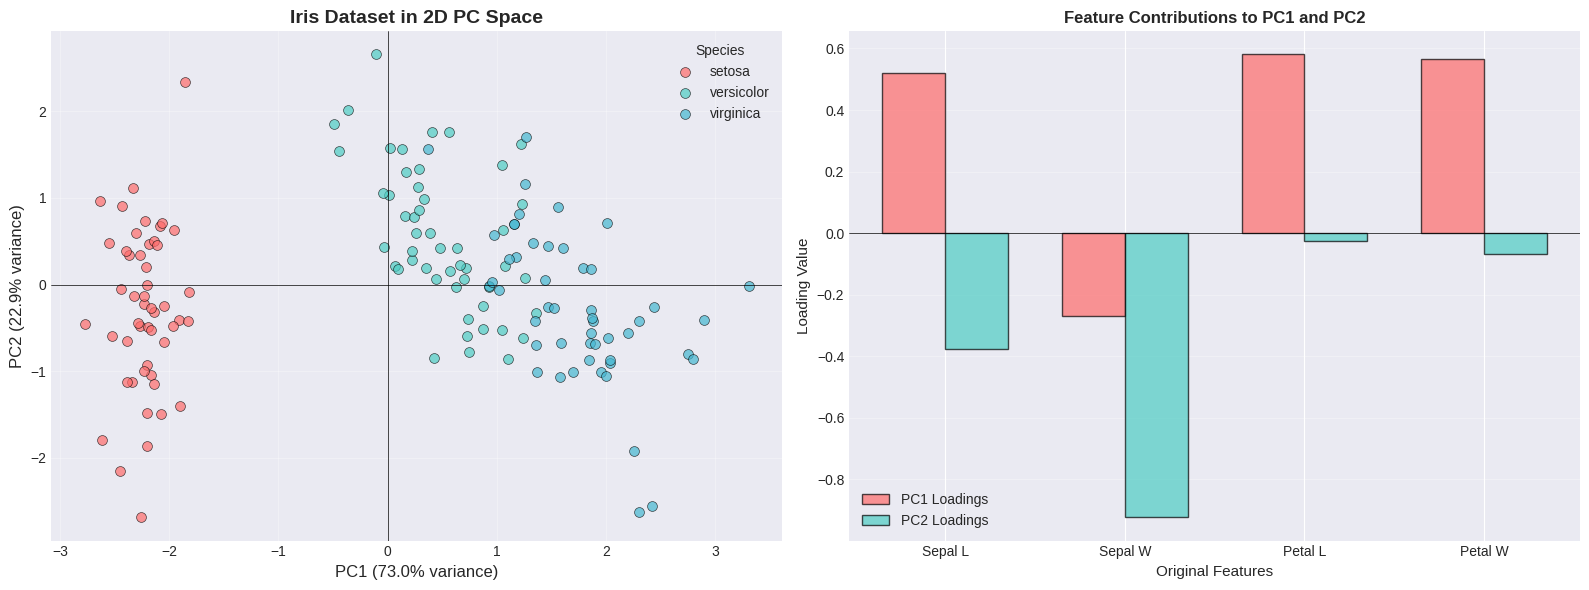


Interpretation:
- PC1 has strong positive contributions from all features, especially petal measurements
  → PC1 represents overall flower size
- PC2 has positive contribution from sepal width and negative from other features
  → PC2 contrasts sepal width vs length characteristics

- The three species are well-separated in this 2D space!
- We've reduced from 4D to 2D while preserving class separability


In [9]:
# Transform to PC space
X_iris_centered = X_iris_scaled - X_iris_scaled.mean(axis=0)
X_iris_pca = X_iris_centered @ eigenvectors_iris

# Keep only first 2 PCs
X_iris_2d = X_iris_pca[:, :2]

print(f"Reduced Iris data shape: {X_iris_2d.shape}")
print(f"\nFirst 5 samples in 2D PC space:")
print(X_iris_2d[:5])

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot in PC space colored by species
colors_map = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, (target, name) in enumerate(zip([0, 1, 2], target_names)):
    mask = y_iris == target
    axes[0].scatter(X_iris_2d[mask, 0], X_iris_2d[mask, 1], 
                   c=colors_map[i], label=name, s=50, alpha=0.7, edgecolors='black', linewidth=0.5)

axes[0].set_xlabel(f'PC1 ({explained_var_iris[0]*100:.1f}% variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({explained_var_iris[1]*100:.1f}% variance)', fontsize=12)
axes[0].set_title('Iris Dataset in 2D PC Space', fontsize=14, fontweight='bold')
axes[0].legend(title='Species', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# Show feature contributions (loadings) to PC1 and PC2
loadings = eigenvectors_iris[:, :2]
feature_abbrev = ['Sepal L', 'Sepal W', 'Petal L', 'Petal W']

x_pos = np.arange(len(feature_abbrev))
width = 0.35

bars1 = axes[1].bar(x_pos - width/2, loadings[:, 0], width, 
                   label='PC1 Loadings', color='#FF6B6B', alpha=0.7, edgecolor='black')
bars2 = axes[1].bar(x_pos + width/2, loadings[:, 1], width,
                   label='PC2 Loadings', color='#4ECDC4', alpha=0.7, edgecolor='black')

axes[1].set_ylabel('Loading Value', fontsize=11)
axes[1].set_xlabel('Original Features', fontsize=11)
axes[1].set_title('Feature Contributions to PC1 and PC2', fontsize=12, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(feature_abbrev)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- PC1 has strong positive contributions from all features, especially petal measurements")
print("  → PC1 represents overall flower size")
print("- PC2 has positive contribution from sepal width and negative from other features")
print("  → PC2 contrasts sepal width vs length characteristics")
print("\n- The three species are well-separated in this 2D space!")
print("- We've reduced from 4D to 2D while preserving class separability")

# Understanding the Curse of Dimensionality

Let's visualize why dimensionality reduction is so important by demonstrating the curse of dimensionality.

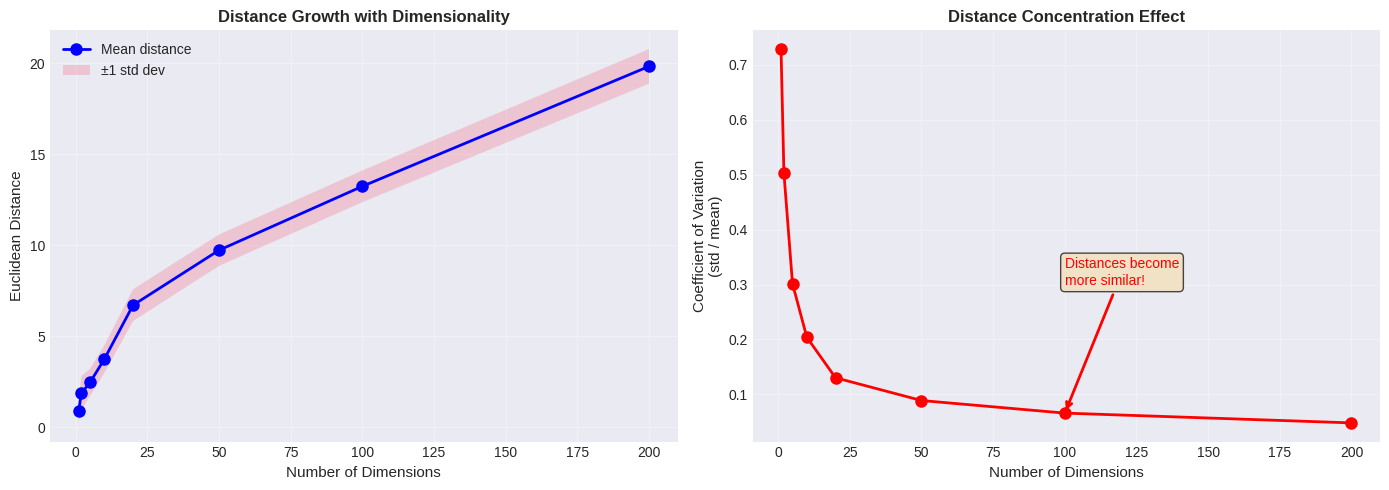

Curse of Dimensionality Observations:

1. Mean distance in 1D: 0.88
   Mean distance in 200D: 19.83
   → Distances grow with dimensions (points become farther apart)

2. Coefficient of variation in 1D: 0.7287
   Coefficient of variation in 200D: 0.0481
   → Relative differences decrease (all points become 'equally far')

3. This makes nearest-neighbor concepts less meaningful in high dimensions!
   → Dimensionality reduction helps by focusing on meaningful dimensions.


In [10]:
# Demonstrate curse of dimensionality with distance calculations
np.random.seed(42)
n_samples = 100
dimensions = [1, 2, 5, 10, 20, 50, 100, 200]

mean_distances = []
std_distances = []

for d in dimensions:
    # Generate random points in d dimensions
    points = np.random.randn(n_samples, d)
    
    # Calculate distances from first point to all others
    distances = np.sqrt(np.sum((points[0] - points[1:]) ** 2, axis=1))
    
    mean_distances.append(np.mean(distances))
    std_distances.append(np.std(distances))

mean_distances = np.array(mean_distances)
std_distances = np.array(std_distances)

# Calculate coefficient of variation (std/mean)
cv = std_distances / mean_distances

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distance growth
axes[0].plot(dimensions, mean_distances, 'bo-', linewidth=2, markersize=8, label='Mean distance')
axes[0].fill_between(dimensions, 
                     mean_distances - std_distances, 
                     mean_distances + std_distances,
                     alpha=0.3, label='±1 std dev')
axes[0].set_xlabel('Number of Dimensions', fontsize=11)
axes[0].set_ylabel('Euclidean Distance', fontsize=11)
axes[0].set_title('Distance Growth with Dimensionality', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Relative distance variation
axes[1].plot(dimensions, cv, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Dimensions', fontsize=11)
axes[1].set_ylabel('Coefficient of Variation\n(std / mean)', fontsize=11)
axes[1].set_title('Distance Concentration Effect', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add annotation
axes[1].annotate('Distances become\nmore similar!', 
                xy=(dimensions[-2], cv[-2]), 
                xytext=(100, 0.3),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, color='red',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.show()

print("Curse of Dimensionality Observations:")
print(f"\n1. Mean distance in 1D: {mean_distances[0]:.2f}")
print(f"   Mean distance in 200D: {mean_distances[-1]:.2f}")
print(f"   → Distances grow with dimensions (points become farther apart)")

print(f"\n2. Coefficient of variation in 1D: {cv[0]:.4f}")
print(f"   Coefficient of variation in 200D: {cv[-1]:.4f}")
print(f"   → Relative differences decrease (all points become 'equally far')")

print("\n3. This makes nearest-neighbor concepts less meaningful in high dimensions!")
print("   → Dimensionality reduction helps by focusing on meaningful dimensions.")

# Hands-On Exercise: Exploring PCA on the Digits Dataset

Now it's your turn to apply what you've learned! The digits dataset contains images of handwritten digits (0-9), where each image is 8x8 pixels, giving us 64 dimensions.

**Your tasks:**
1. Load and explore the digits dataset
2. Perform PCA manually using the steps we've learned
3. Determine how many components are needed to retain 95% of variance
4. Visualize the digits in 2D PC space

Digits dataset shape: (1797, 64)
Number of samples: 1797
Number of features (pixels): 64
Number of classes: 10


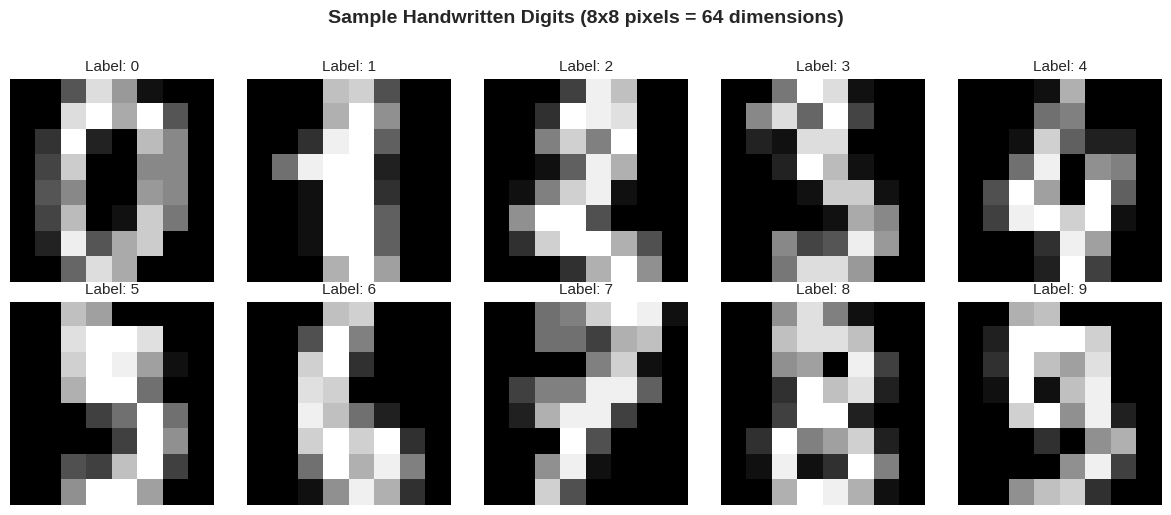

In [11]:
# Load the digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Digits dataset shape: {X_digits.shape}")
print(f"Number of samples: {X_digits.shape[0]}")
print(f"Number of features (pixels): {X_digits.shape[1]}")
print(f"Number of classes: {len(np.unique(y_digits))}")

# Visualize some example digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(digits.images[i], cmap='gray')
    axes[i].set_title(f'Label: {y_digits[i]}', fontsize=11)
    axes[i].axis('off')

plt.suptitle('Sample Handwritten Digits (8x8 pixels = 64 dimensions)', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Standardized data shape: (1797, 64)
Mean of each feature (should be ~0): [ 0.00000000e+00 -2.56086502e-16 -2.34771702e-16 -3.05326777e-16
  1.39689163e-16]
Std of each feature (should be ~1): [0. 1. 1. 1. 1.]

Covariance matrix shape: (64, 64)

Number of components needed for 95% variance: 40
Dimensionality reduction: 64 → 40
Compression ratio: 62.5%


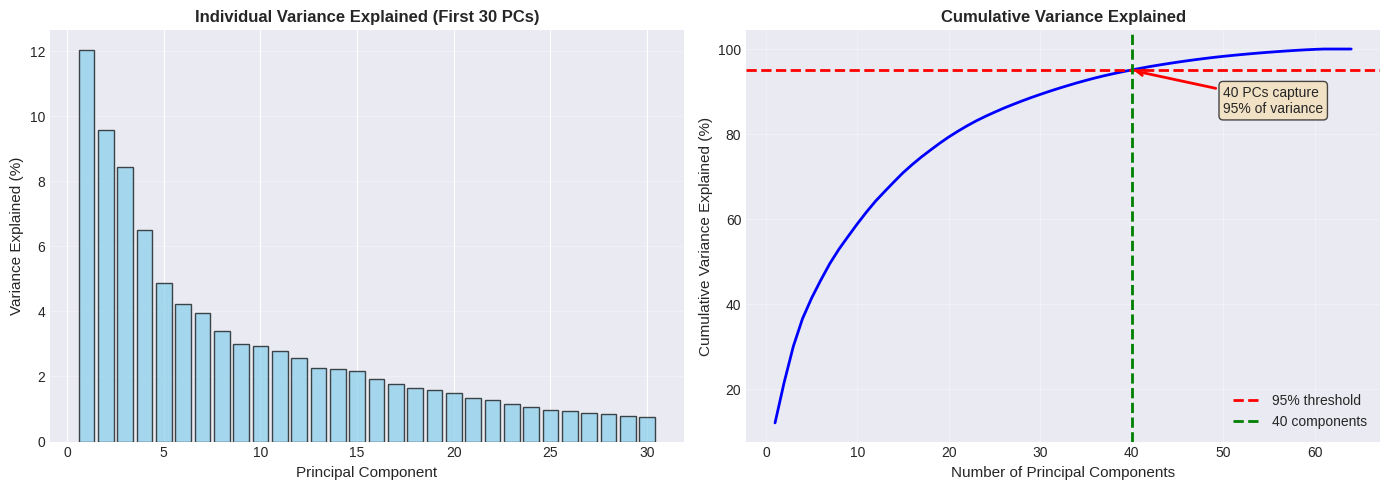

In [12]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

print(f"Standardized data shape: {X_digits_scaled.shape}")
print(f"Mean of each feature (should be ~0): {X_digits_scaled.mean(axis=0)[:5]}")
print(f"Std of each feature (should be ~1): {X_digits_scaled.std(axis=0)[:5]}")

# Step 2: Compute covariance matrix
cov_digits = np.cov(X_digits_scaled.T)
print(f"\nCovariance matrix shape: {cov_digits.shape}")

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues_digits, eigenvectors_digits = np.linalg.eig(cov_digits)

# Step 4: Sort by eigenvalues
idx = eigenvalues_digits.argsort()[::-1]
eigenvalues_digits = eigenvalues_digits[idx]
eigenvectors_digits = eigenvectors_digits[:, idx]

# Step 5: Calculate explained variance
explained_var_digits = eigenvalues_digits / eigenvalues_digits.sum()
cumulative_var_digits = np.cumsum(explained_var_digits)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_var_digits >= 0.95) + 1

print(f"\nNumber of components needed for 95% variance: {n_components_95}")
print(f"Dimensionality reduction: {X_digits.shape[1]} → {n_components_95}")
print(f"Compression ratio: {n_components_95/X_digits.shape[1]*100:.1f}%")

# Visualize variance explained
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Explained variance ratio
n_show = 30  # Show first 30 components
axes[0].bar(range(1, n_show+1), explained_var_digits[:n_show] * 100, 
           color='skyblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Principal Component', fontsize=11)
axes[0].set_ylabel('Variance Explained (%)', fontsize=11)
axes[0].set_title(f'Individual Variance Explained (First {n_show} PCs)', 
                 fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative variance
axes[1].plot(range(1, len(cumulative_var_digits)+1), cumulative_var_digits * 100, 
            'b-', linewidth=2)
axes[1].axhline(y=95, color='r', linestyle='--', linewidth=2, label='95% threshold')
axes[1].axvline(x=n_components_95, color='g', linestyle='--', linewidth=2, 
               label=f'{n_components_95} components')
axes[1].set_xlabel('Number of Principal Components', fontsize=11)
axes[1].set_ylabel('Cumulative Variance Explained (%)', fontsize=11)
axes[1].set_title('Cumulative Variance Explained', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Add annotation
axes[1].annotate(f'{n_components_95} PCs capture\n95% of variance', 
                xy=(n_components_95, 95), 
                xytext=(n_components_95 + 10, 85),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.show()

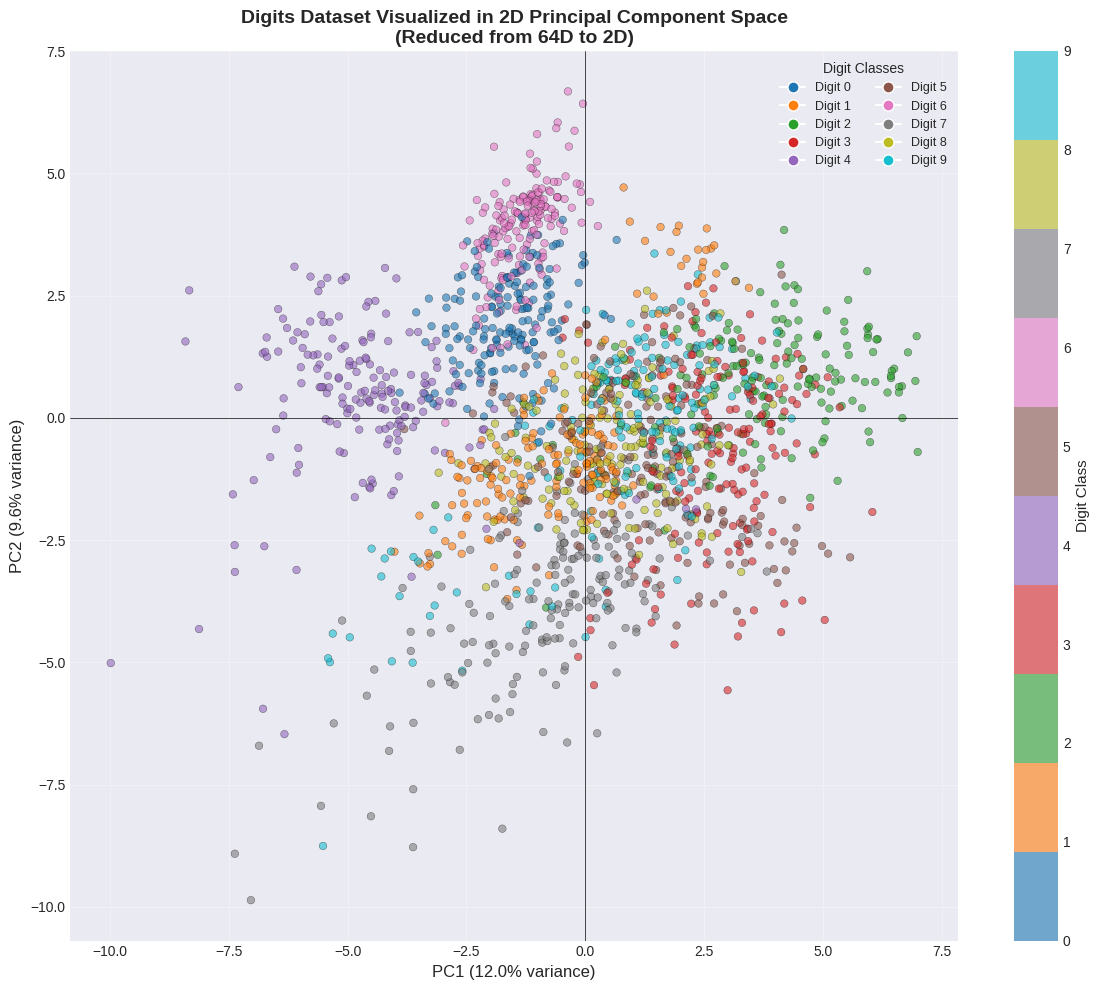

Observations:
- We've reduced 64 dimensions to 2 while retaining visual separability
- First 2 PCs capture 21.6% of variance
- Some digit classes cluster together (e.g., 0s, 1s)
- Other classes overlap, suggesting they share similar features
- This visualization helps us understand the data structure!


In [13]:
# Step 6: Transform to PC space and visualize in 2D
X_digits_centered = X_digits_scaled - X_digits_scaled.mean(axis=0)
X_digits_pca = X_digits_centered @ eigenvectors_digits
X_digits_2d = X_digits_pca[:, :2]

# Create a beautiful visualization
fig = plt.figure(figsize=(12, 10))

# Main scatter plot
ax = fig.add_subplot(111)

# Use a nice color map
scatter = ax.scatter(X_digits_2d[:, 0], X_digits_2d[:, 1], 
                    c=y_digits, cmap='tab10', 
                    s=30, alpha=0.6, edgecolors='black', linewidth=0.3)

ax.set_xlabel(f'PC1 ({explained_var_digits[0]*100:.1f}% variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_var_digits[1]*100:.1f}% variance)', fontsize=12)
ax.set_title('Digits Dataset Visualized in 2D Principal Component Space\n(Reduced from 64D to 2D)', 
            fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, ticks=range(10))
cbar.set_label('Digit Class', fontsize=11)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=plt.cm.tab10(i/10), 
                             markersize=8, label=f'Digit {i}')
                  for i in range(10)]
ax.legend(handles=legend_elements, loc='upper right', 
         title='Digit Classes', ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

print("Observations:")
print("- We've reduced 64 dimensions to 2 while retaining visual separability")
print(f"- First 2 PCs capture {cumulative_var_digits[1]*100:.1f}% of variance")
print("- Some digit classes cluster together (e.g., 0s, 1s)")
print("- Other classes overlap, suggesting they share similar features")
print("- This visualization helps us understand the data structure!")

# Key Takeaways

Congratulations on completing Day 41! Let's summarize what you've learned:

## Core Concepts

1. **Dimensionality Reduction Purpose**:
   - Reduces computational complexity and storage requirements
   - Mitigates the curse of dimensionality
   - Enables visualization of high-dimensional data
   - Can improve model performance by removing noise

2. **Principal Component Analysis (PCA)**:
   - Linear transformation technique that finds directions of maximum variance
   - Principal components are orthogonal and ordered by variance
   - First few components typically capture most of the data's variance

3. **Mathematical Foundation**:
   - **Variance**: Measures spread of a single variable
   - **Covariance**: Measures how two variables change together
   - **Covariance Matrix**: Captures all pairwise covariances
   - **Eigenvalues**: Indicate variance in principal component directions
   - **Eigenvectors**: Define the principal component directions

4. **PCA Algorithm Steps**:
   1. Standardize the data (center and optionally scale)
   2. Compute the covariance matrix
   3. Calculate eigenvalues and eigenvectors
   4. Sort components by eigenvalues (descending)
   5. Select top k components
   6. Transform data to new PC space

5. **Practical Insights**:
   - Always standardize data before PCA (unless features have same scale)
   - Use explained variance ratio to decide how many components to keep
   - Common threshold: retain components explaining 95% of variance
   - PCA is unsupervised—it doesn't use class labels
   - Principal components are interpretable through loadings (feature contributions)

## What You Can Now Do

- Explain when and why to use dimensionality reduction
- Understand the mathematical concepts underlying PCA
- Manually compute principal components from a covariance matrix
- Interpret explained variance and choose appropriate dimensionality
- Visualize high-dimensional data in 2D/3D using PCA

## Looking Ahead

In Day 42, you'll learn to:
- Implement PCA efficiently using scikit-learn
- Apply PCA to real-world datasets
- Use PCA for preprocessing in machine learning pipelines
- Compare different numbers of components and their impact on model performance
- Explore inverse transformations and reconstructions

# Further Resources

To deepen your understanding of PCA and dimensionality reduction, explore these resources:

## Online Tutorials and Guides

1. **[StatQuest: PCA in Python](https://www.youtube.com/watch?v=FgakZw6K1QQ)** - Excellent video explanation with clear visualizations
   
2. **[DataCamp's PCA Tutorial](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python)** - Comprehensive guide with practical examples

3. **[Machine Learning Mastery: Calculate PCA from Scratch](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)** - Step-by-step implementation

## Academic Resources

4. **[A Tutorial on Principal Component Analysis](https://arxiv.org/abs/1404.1100)** - Jonathon Shlens' seminal paper on PCA

5. **[Principal Component Analysis Explained Visually](http://setosa.io/ev/principal-component-analysis/)** - Interactive visualization tool

## Documentation

6. **[Scikit-learn PCA Documentation](https://scikit-learn.org/stable/modules/decomposition.html#pca)** - Official documentation for tomorrow's lesson

7. **[NumPy Linear Algebra Documentation](https://numpy.org/doc/stable/reference/routines.linalg.html)** - For understanding eigenvalue computations

## Additional Topics

- **Kernel PCA**: Non-linear dimensionality reduction
- **Incremental PCA**: For datasets too large for memory
- **Sparse PCA**: When you need sparse loadings for interpretability
- **Probabilistic PCA**: Bayesian approach to PCA

## Practice Datasets

Try applying PCA to these datasets:
- MNIST handwritten digits (higher resolution than digits dataset)
- Wine quality dataset
- Gene expression data
- Image datasets for compression

---

**Great work today!** You've built a solid theoretical foundation in dimensionality reduction and PCA. Tomorrow, we'll put this knowledge into practice with scikit-learn and tackle real-world applications. Keep up the excellent progress!